In [20]:
!pip install sqlalchemy pandas mysql-connector-python psycopg2-binary openpyxl


In [13]:
import pandas as pd
from sqlalchemy import create_engine, text


In [11]:
username = 'root'
password = 'Dilrosemysql1'
host = '127.0.0.1'
port = '3306'
database = 'superstore'

connection_string = f"mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}"

engine = create_engine(connection_string)


In [14]:
# This should work without error
with engine.connect() as conn:
    result = conn.execute(text("SELECT 1"))
    print(result.fetchone())


(1,)


In [15]:
from sqlalchemy import inspect

inspector = inspect(engine)
print(inspector.get_table_names())


['customers', 'orders', 'products', 'regions']


In [19]:
# Load individual tables
orders_df = pd.read_sql('orders', con=engine)
products_df = pd.read_sql('products', con=engine)
customers_df = pd.read_sql('customers', con=engine)
regions_df = pd.read_sql('regions', con=engine)

# Inspect
print(orders_df.shape)
print(products_df.shape)
print(customers_df.shape)
print(regions_df.shape)


(9994, 10)
(9994, 4)
(9994, 4)
(19988, 3)


### Load Tables from SQL
We load the Orders, Customers, and Products tables separately to inspect them and validate the schema.



In [18]:
# Read a custom SQL query
query = """
SELECT
  O.OrderID, O.OrderDate, O.Sales, O.Profit,
  C.CustomerName, P.Category
FROM
  Orders O
JOIN
  Customers C ON O.CustomerID = C.CustomerID
JOIN
  Products P ON O.ProductID = P.ProductID
"""
df = pd.read_sql(query, con=engine)
df.head()


,OrderID,OrderDate,Sales,Profit,CustomerName,Category
0,CA-2016-152156,2016-08-11,732.0,220.0,Claire Gute,Furniture
1,CA-2016-152156,2016-08-11,732.0,220.0,Claire Gute,Furniture
2,CA-2016-152156,2016-08-11,732.0,220.0,Claire Gute,Furniture
3,CA-2016-152156,2016-08-11,732.0,220.0,Claire Gute,Furniture
4,CA-2016-152156,2016-08-11,732.0,220.0,Claire Gute,Furniture


In [30]:
file_path =r"C:\Users\Dell\Downloads\combined_data.xlsx"
df = pd.read_excel(file_path)


In [32]:
df.head()
df.info

<bound method DataFrame.info of       Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-08-11 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-08-11 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-12-06 2016-06-16    Second Class   
3          4  US-2015-108966 2015-11-10 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-11-10 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-04-05 2017-09-05    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer 

In [33]:
df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [36]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


#### Date Conversion

Converted `Order Date` and `Ship Date` to datetime format to enable time-based analysis like monthly trends and shipping duration.


In [37]:
df.duplicated().sum()


0

In [41]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.drop(['row_id', 'postal_code'], axis=1, inplace=True)

### Column Cleaning

Standardized column names (lowercase, underscores) for easier access, and dropped irrelevant columns `row_id` and `postal_code`.


In [43]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'country', 'city', 'state', 'region',
       'product_id', 'category', 'sub-category', 'product_name', 'sales',
       'quantity', 'discount', 'profit'],
      dtype='object')

### Load & Prepare Combined Dataset
We imported our combined sales dataset from Excel. This single table already contains customer, product, and order dimensions, along with sales and profit measures, making it ideal for analysis without further joins.


In [48]:
df.describe()


,order_date,ship_date,sales,quantity,discount,profit
count,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
mean,2016-04-11 07:17:44.078447104,2016-04-20 15:38:17.458475008,229.858001,3.789574,0.156203,28.656896
min,2014-01-02 00:00:00,2014-01-04 00:00:00,0.444000,1.000000,0.000000,-6599.978000
25%,2015-05-01 00:00:00,2015-05-07 00:00:00,17.280000,2.000000,0.000000,1.728750
50%,2016-05-30 00:00:00,2016-06-12 00:00:00,54.490000,3.000000,0.200000,8.666500
75%,2017-04-09 00:00:00,2017-04-29 00:00:00,209.940000,5.000000,0.200000,29.364000
max,2017-12-30 00:00:00,2018-05-01 00:00:00,22638.480000,14.000000,0.800000,8399.976000
std,NaN,NaN,623.245101,2.225110,0.206452,234.260108


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt


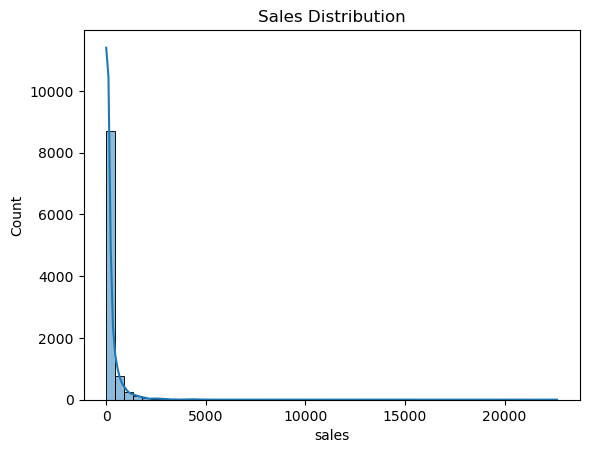

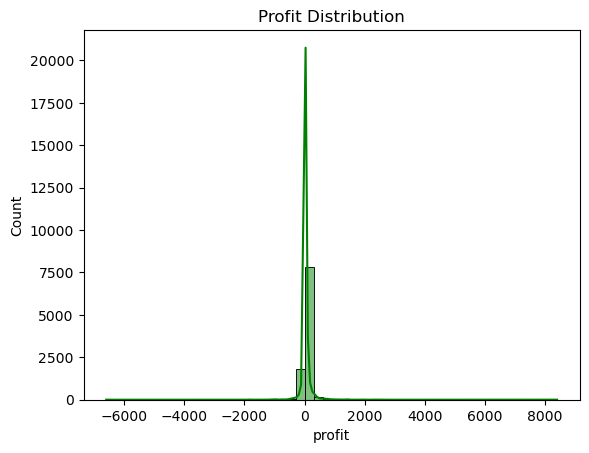

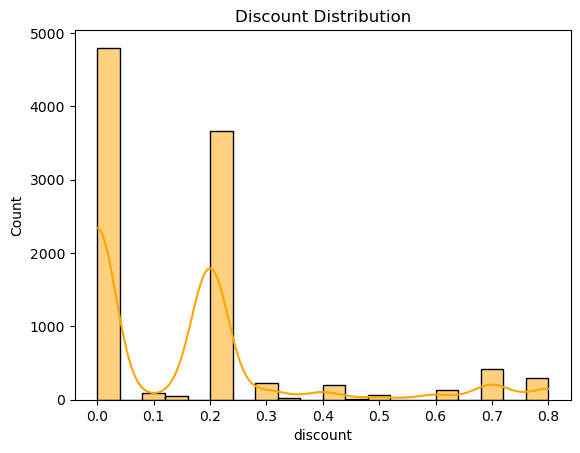

In [54]:
sns.histplot(df['sales'], bins=50, kde=True)
plt.title("Sales Distribution")
plt.show()

sns.histplot(df['profit'], bins=50, kde=True, color='green')
plt.title("Profit Distribution")
plt.show()

sns.histplot(df['discount'], bins=20, kde=True, color='orange')
plt.title("Discount Distribution")
plt.show()


### 📊 Distribution Plots

Plotted distributions for key numeric variables:

- **Sales**: Heavily right-skewed, indicating large low-value and few high-value orders.
- **Profit**: Wide spread with possible losses and profits, most centered around zero.
- **Discount**: Mostly clustered around common discount rates.



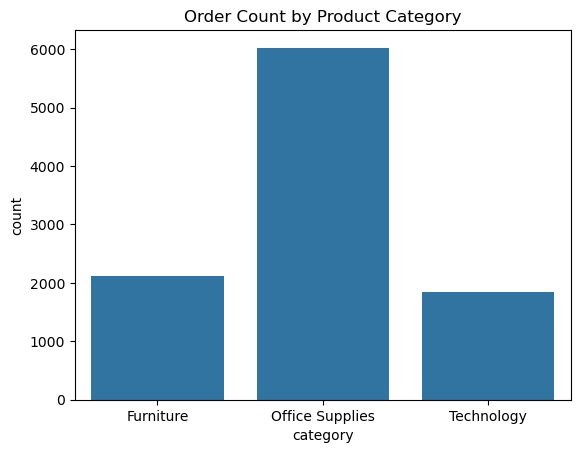

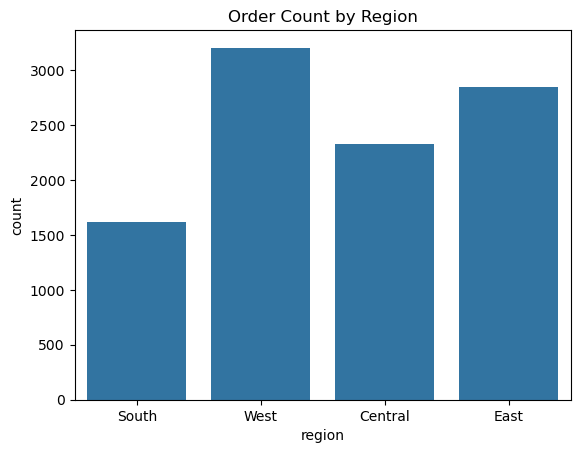

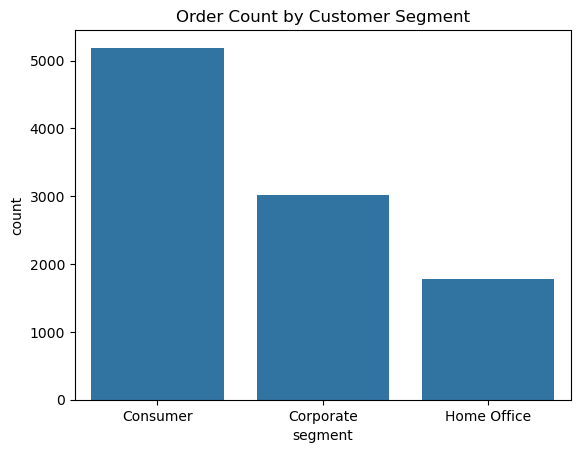

In [55]:
sns.countplot(data=df, x='category')
plt.title("Order Count by Product Category")
plt.show()

sns.countplot(data=df, x='region')
plt.title("Order Count by Region")
plt.show()

sns.countplot(data=df, x='segment')
plt.title("Order Count by Customer Segment")
plt.show()


### Order Counts by Category, Region, Segments

- **Category**: Shows which product types are most sold - Office Supplies
- **Region**: Highlights regional demand distribution - West region with most order counts and south with the least.
- **Segment**: Identifies dominant customer segments - Consumer segment is the most dominant.


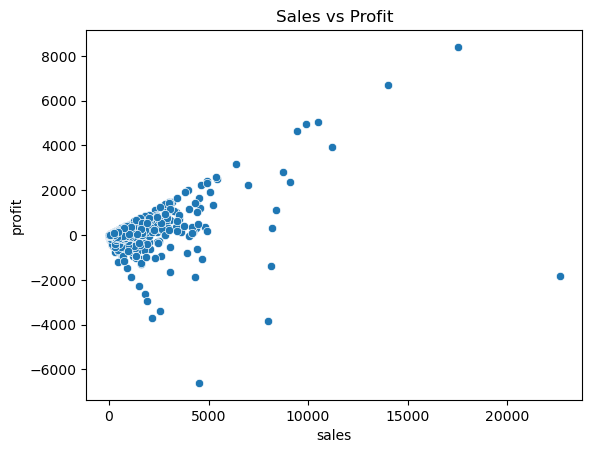

In [56]:
sns.scatterplot(data=df, x='sales', y='profit')
plt.title("Sales vs Profit")
plt.show()


### Sales vs Profit Relationship

Scatter plot shows:
- Positive trend overall, but some high-sales orders have low or negative profit.
- Possible impact of discounts or overstocking.


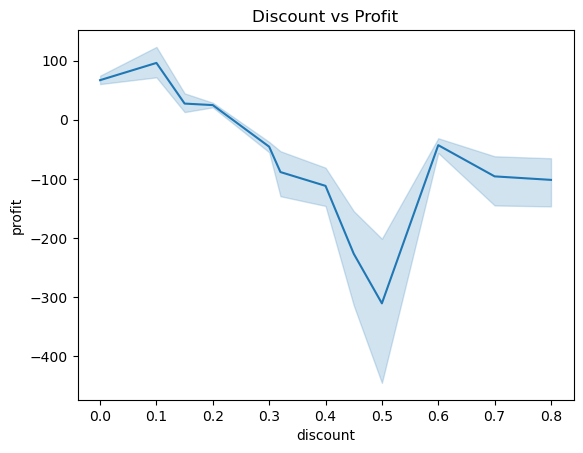

In [141]:
sns.lineplot(data=df, x='discount', y='profit')
plt.title("Discount vs Profit")
plt.show()


### Discount Impact on Profit

Line plot indicates that higher discounts often lead to lower profits, 50% discounts incur the largest losses.


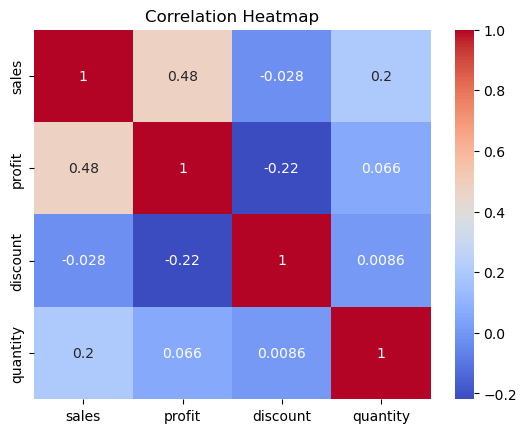

In [58]:
numerical_cols = ['sales', 'profit', 'discount', 'quantity']
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### Correlation Between Numerical Features

Heatmap shows:
- **Sales & Profit**: Moderate positive correlation.
- **Discount & Profit**: Negative correlation, confirming earlier plot.
- **Quantity**: Positive correlation with sales and weak correlation with other variables.


In [59]:
df['month'] = df['order_date'].dt.to_period('M')


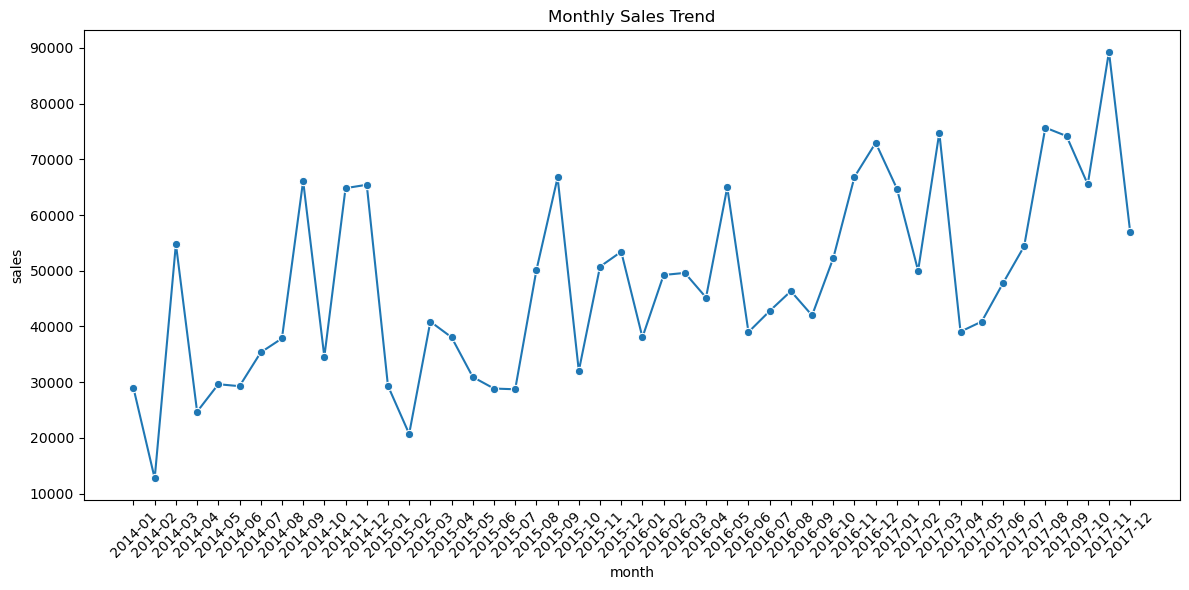

In [60]:
monthly_sales = df.groupby('month')['sales'].sum().reset_index()
monthly_sales['month'] = monthly_sales['month'].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='month', y='sales', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.tight_layout()
plt.show()


### Monthly Sales Trend

Line plot reveals sales fluctuations across months-Sales are gradually increasing over time. It is useful for identifying seasonal patterns and planning promotions.


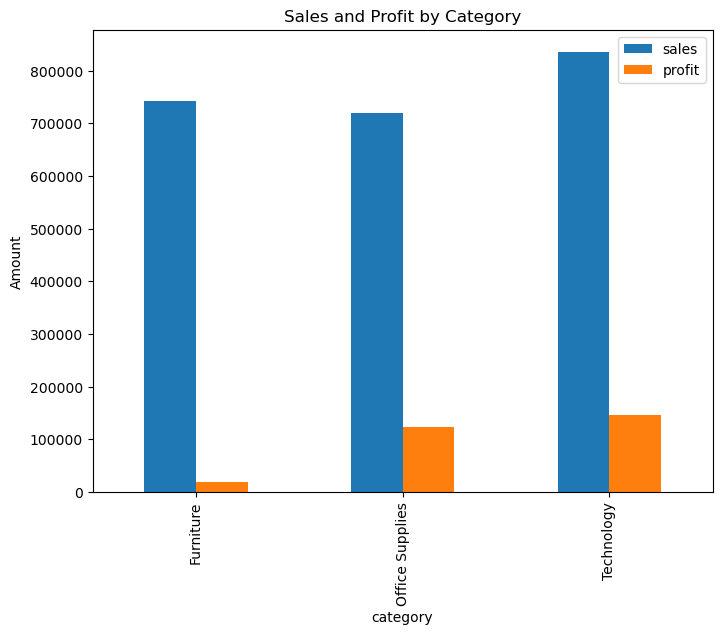

In [61]:
cat_perf = df.groupby('category')[['sales', 'profit']].sum().reset_index()

cat_perf.plot(kind='bar', x='category', figsize=(8,6), stacked=False)
plt.title("Sales and Profit by Category")
plt.ylabel("Amount")
plt.show()


### Sales vs Profit by Category

Bar chart compares total sales and profit across product categories—helps identify the most and least profitable ones.


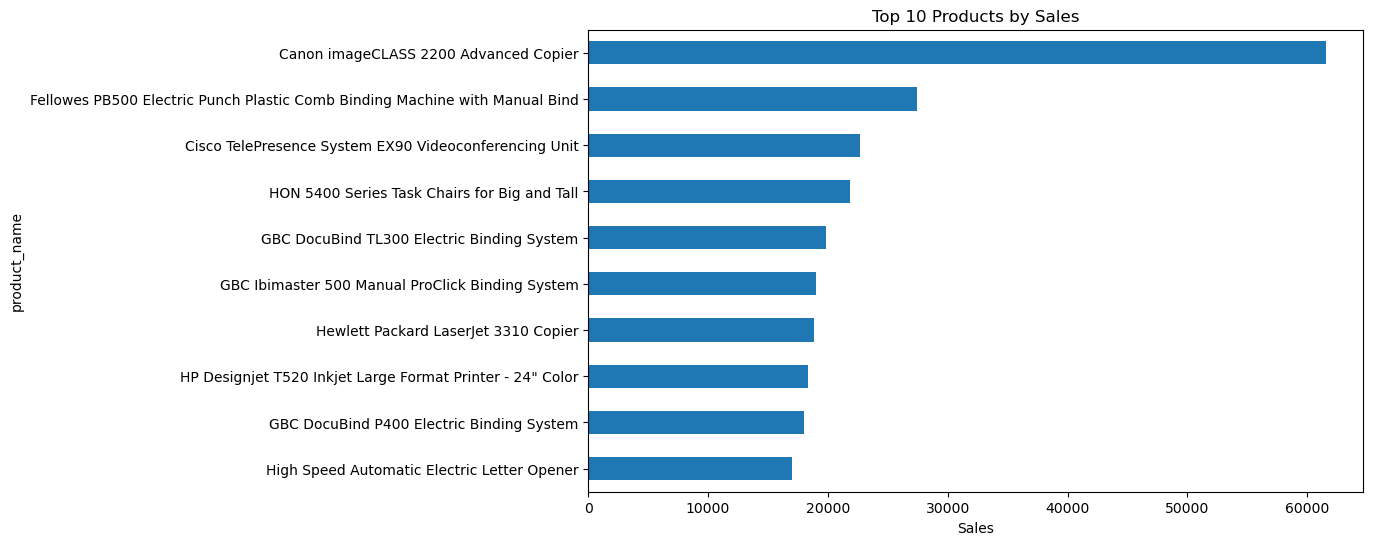

In [62]:
top_products = df.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='barh', figsize=(10,6))
plt.title("Top 10 Products by Sales")
plt.xlabel("Sales")
plt.gca().invert_yaxis()
plt.show()


### Top 10 Best-Selling Products

Horizontal bar chart highlights the top-performing products by total sales—useful for inventory and marketing focus.


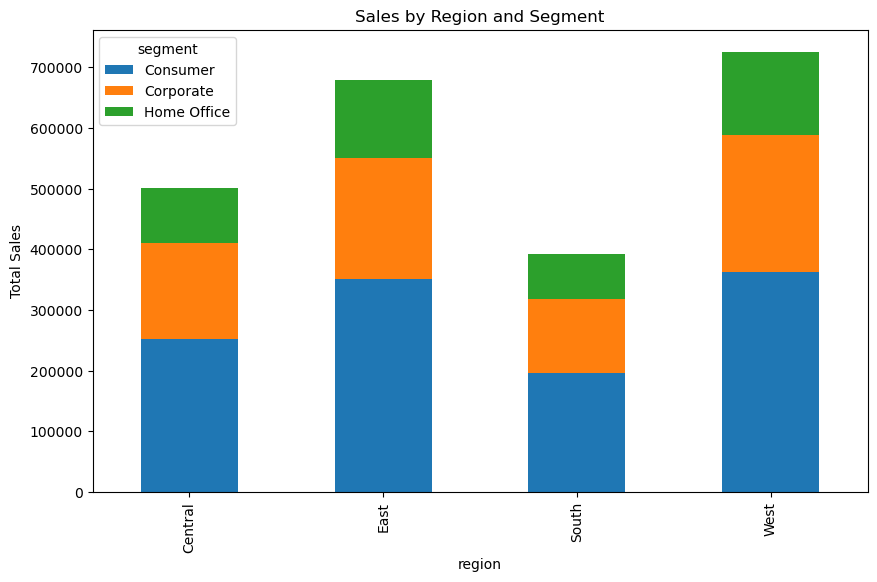

In [63]:
pivot = df.pivot_table(index='region', columns='segment', values='sales', aggfunc='sum')

pivot.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Sales by Region and Segment")
plt.ylabel("Total Sales")
plt.show()


### Sales Breakdown by Region and Segment

Stacked bar chart shows how different customer segments contribute to regional sales—helps target region-specific strategies.
West contribute more to sales while South contributes the least.


In [64]:
df['shipping_delay'] = (df['ship_date'] - df['order_date']).dt.days


In [65]:
df.groupby('ship_mode')['shipping_delay'].mean()


ship_mode
First Class        6.718466
Same Day           0.559853
Second Class       5.188175
Standard Class    12.180295
Name: shipping_delay, dtype: float64

### Average Shipping Delay by Ship Mode

Calculated mean shipping delay for each shipping mode to evaluate delivery efficiency and customer satisfaction impact.
Standard Class has the highest shipping delay while Same-day shipping mode has the lowest.


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [67]:
today_date = df['order_date'].max() + pd.Timedelta(days=1)
print("Reference date:", today_date)


Reference date: 2017-12-31 00:00:00


In [68]:
rfm = df.groupby('customer_id').agg({
    'order_date': lambda x: (today_date - x.max()).days,
    'order_id': 'nunique',
    'sales': 'sum'
}).reset_index()

rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']
rfm.head()


,customer_id,recency,frequency,monetary
0,AA-10315,185,5,5563.560
1,AA-10375,49,9,1056.390
2,AA-10480,260,4,1790.512
3,AA-10645,234,6,5086.935
4,AB-10015,446,3,886.156


### RFM Feature Engineering (Recency, Frequency, Monetary)

Created key metrics to understand customer behavior:

- **Recency**: Calculated as the number of days since the customer's most recent order (from a reference date). Lower values imply recent engagement.
- **Frequency**: Counted the total number of unique orders per customer. Higher values indicate repeat purchases and loyalty.
- **Monetary**: Total sales amount contributed by each customer, helping identify high-value customers.

These RFM features form the foundation for clustering customers into actionable segments.


In [69]:
rfm.describe()


,recency,frequency,monetary
count,793.000000,793.000000,793.000000
mean,164.388398,6.316520,2896.848500
std,190.497184,2.550885,2628.670117
min,1.000000,1.000000,4.833000
25%,38.000000,5.000000,1146.050000
50%,97.000000,6.000000,2256.394000
75%,219.000000,8.000000,3785.276000
max,1166.000000,17.000000,25043.050000


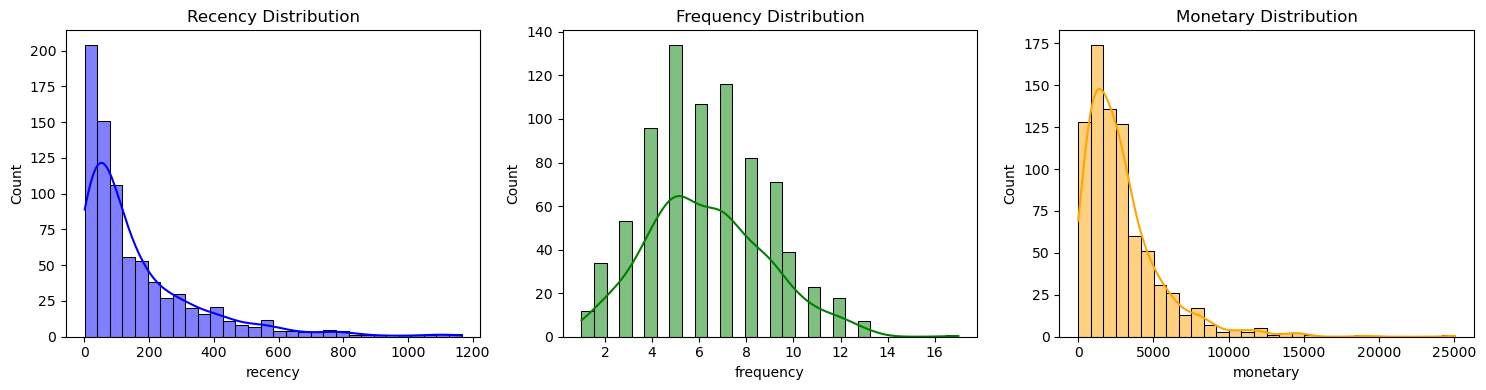

In [70]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.histplot(rfm['recency'], bins=30, kde=True, color='blue')
plt.title('Recency Distribution')

plt.subplot(1,3,2)
sns.histplot(rfm['frequency'], bins=30, kde=True, color='green')
plt.title('Frequency Distribution')

plt.subplot(1,3,3)
sns.histplot(rfm['monetary'], bins=30, kde=True, color='orange')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()


### Distribution of RFM Metrics

Visualized the spread of:

- **Recency**: Skewed right, most customers ordered within 100 days while few ordered a long time ago.
- **Frequency**: Normally distributed. Majority of customers have order counts between 5-7.
- **Monetary**: Skewed right, most customers orders for a low monetary value between 0-5000.

These patterns help identify segmentation strategy.


In [71]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['recency', 'frequency', 'monetary']])


### Feature Scaling with StandardScaler

Normalized the RFM features to ensure equal weight during clustering. StandardScaler transforms data to have zero mean and unit variance—crucial for algorithms like K-Means.


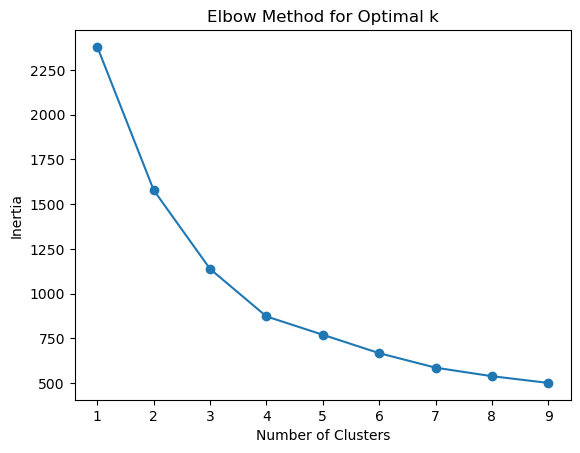

In [72]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


### Finding Optimal Clusters with Elbow Method

Used the Elbow Method to determine the best value for `k` in K-Means:

- **Inertia** (sum of squared distances) was plotted for k = 1 to 9.
- The "elbow point" (where inertia sharply decreases) suggests the ideal number of clusters. Here, k = 3.


In [108]:
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['cluster'] = kmeans.fit_predict(rfm_scaled)
rfm.head()


,customer_id,recency,frequency,monetary,cluster
0,AA-10315,185,5,5563.560,0
1,AA-10375,49,9,1056.390,0
2,AA-10480,260,4,1790.512,0
3,AA-10645,234,6,5086.935,2
4,AB-10015,446,3,886.156,1


### Customer Segmentation with K-Means

Applied **K-Means Clustering** with `k=3` (as suggested by the Elbow Method).  
Each customer is now assigned to one of three segments based on **Recency, Frequency, and Monetary** behavior.


In [109]:
# Show average RFM scores by cluster
rfm_summary = rfm.groupby('cluster')[['recency', 'frequency', 'monetary']].mean().round(1)
print(rfm_summary)



         recency  frequency  monetary
cluster                              
0          102.7        5.5    1818.5
1          529.6        4.0    1782.1
2           93.0        9.0    5414.6


### Cluster Profiling: Average RFM Scores

Calculated the **average Recency, Frequency, and Monetary** values for each customer segment:

- Helps interpret the **behavioral traits** of each cluster.
- For example:
  - **Low Recency + High Frequency + High Monetary** → Loyal/High-Value Customers.
  - **High Recency + Low Frequency + Low Monetary** → At-risk or Inactive Customers.


In [110]:
rfm['cluster'].value_counts()


cluster
0    434
2    239
1    120
Name: count, dtype: int64

In [113]:
def label_cluster(row):
    if row['cluster'] == 2:
        return 'Best Customers'
    elif row['cluster'] == 1:
        return 'Lost Customers'
    else:
        return 'Loyal Potential'

rfm['segment'] = rfm.apply(label_cluster, axis=1)


In [114]:
rfm.head()

,customer_id,recency,frequency,monetary,cluster,segment
0,AA-10315,185,5,5563.560,0,Loyal Potential
1,AA-10375,49,9,1056.390,0,Loyal Potential
2,AA-10480,260,4,1790.512,0,Loyal Potential
3,AA-10645,234,6,5086.935,2,Best Customers
4,AB-10015,446,3,886.156,1,Lost Customers


### Cluster Labeling

Assigned intuitive labels to each customer segment based on RFM behavior:

- **Best Customers**: Recently purchased, frequent buyers with high monetary value.
- **Lost Customers**: Haven’t purchased in a long time, low frequency and spending.
- **Loyal Potential**: Moderate recency and frequency, potential for growth with engagement.

These labels help turn numeric clusters into actionable business insights.


In [145]:
rfm['segment'].value_counts()

segment
Loyal Potential    434
Best Customers     239
Lost Customers     120
Name: count, dtype: int64

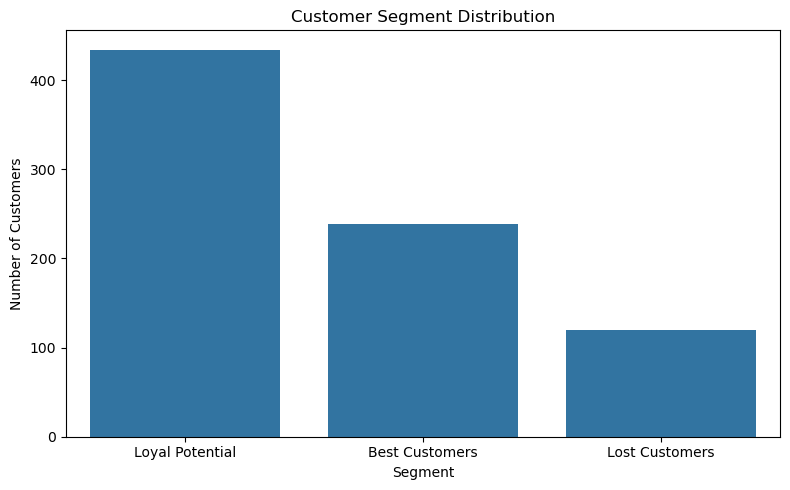

In [119]:
plt.figure(figsize=(8,5))
sns.countplot(x='segment', data=rfm)
plt.title('Customer Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

### Customer Segment Distribution

This chart shows the distribution of customers across three segments derived from RFM analysis:

- **Loyal Potential (434 customers)**: The largest group. These customers show frequent or recent activity but moderate spending. They are prime targets for loyalty programs or upselling strategies.

- **Best Customers (239 customers)**: High-value, frequent, and recent buyers. This segment should be prioritized for retention and VIP offers.

- **Lost Customers (120 customers)**: These are inactive or low-spending customers. Win-back strategies like re-engagement emails or discounts may help revive this segment.

This segmentation guides strategic marketing actions tailored to customer behavior.


## Author
Mohamed Dilrose P M